Time Series Analysis of the Air Quality Index (AQI)
Model Used - Prophet Model developed by Facebook (FB Prophet Model)

In [28]:
# Importing pandas module to create data frames
import pandas as pd

In [29]:
# Reading the dataset using the "pd.read_csv()" method
data_2021 = pd.read_csv("dataset/2021.csv")

# Displaying the first and last 5 (default) rows of dataset using "<var_name>.head()" and "<var_name>.tail()"
data_2021.tail()

,Timestamp,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
8755,2021-12-31 19:00:00,193.45,327.58,58.78,44.99,70.96,111.49,13.20,0.58,12.21,...,8.14,NaN,81.22,0.10,174.20,NaN,NaN,3.97,NaN,NaN
8756,2021-12-31 20:00:00,238.55,536.45,98.42,37.85,98.87,121.48,22.77,0.98,11.14,...,13.11,NaN,88.43,0.12,162.22,NaN,NaN,4.52,NaN,NaN
8757,2021-12-31 21:00:00,252.55,418.60,147.79,33.38,135.99,147.31,10.29,1.68,13.31,...,13.17,NaN,89.95,0.10,180.84,NaN,NaN,5.05,NaN,NaN
8758,2021-12-31 22:00:00,243.60,490.78,116.97,33.70,111.50,127.42,6.36,0.90,12.64,...,11.88,NaN,89.92,0.15,176.72,NaN,NaN,5.03,NaN,NaN
8759,2021-12-31 23:00:00,242.30,505.50,63.95,31.43,67.87,90.17,4.18,0.78,12.96,...,8.16,NaN,89.55,0.11,166.76,NaN,NaN,4.58,NaN,NaN


In [30]:
data_2021.shape

(8760, 25)

In [31]:
data_2022 = pd.read_csv("dataset/2022.csv")
data_2022.shape

(8760, 25)

In [32]:
data_2023 = pd.read_csv("dataset/2023.csv")
data_2023.shape

(8760, 25)

In [33]:
data_2024 = pd.read_csv("dataset/2024.csv")
data_2024.shape

(7799, 21)

Data Pre-Processing
1. Selecting only the PM2.5 and PM10 Attributes from the dataset
2. Renameing the Selected attributes of dataframes as 'Date_Time', 'PM2.5' and 'PM10'
3. Converting Date_Time attribute of dataframe data_2024 in "%Y-%m-%d %H:%M:%S" format
4. Checking and Removing the missing values from the data frames
5. Mergeing all the data frames into one dataframe so that we can perform time series analysis on that complete dataset

In [35]:
data_2021 = data_2021[['Timestamp', 'PM2.5 (µg/m³)', 'PM10 (µg/m³)']]
data_2022 = data_2022[['Timestamp', 'PM2.5 (µg/m³)', 'PM10 (µg/m³)']]
data_2023 = data_2023[['Timestamp', 'PM2.5 (µg/m³)', 'PM10 (µg/m³)']]
data_2024 = data_2024[['To Date', 'PM2.5', 'PM10']]

In [36]:
data_2021.rename(columns={'Timestamp': 'Date_Time', 'PM2.5 (µg/m³)': 'PM2.5', 'PM10 (µg/m³)': 'PM10'}, inplace=True)
data_2022.rename(columns={'Timestamp': 'Date_Time', 'PM2.5 (µg/m³)': 'PM2.5', 'PM10 (µg/m³)': 'PM10'}, inplace=True)
data_2023.rename(columns={'Timestamp': 'Date_Time', 'PM2.5 (µg/m³)': 'PM2.5', 'PM10 (µg/m³)': 'PM10'}, inplace=True)
data_2024.rename(columns={'To Date': 'Date_Time'}, inplace=True)

In [37]:
data_2024['Date_Time'] = pd.to_datetime(data_2024['Date_Time'], format="%d-%m-%Y %H:%M")
data_2024['Date_Time'] = data_2024['Date_Time'].dt.strftime("%Y-%m-%d %H:%M:%S")

In [43]:
#Checking for the missing values in the daraframes
data_2021.isnull().sum()

Date_Time      0
PM2.5        440
PM10         475
dtype: int64

In [46]:
data_2022.isnull().sum()

Date_Time      0
PM2.5        440
PM10         475
dtype: int64

In [45]:
data_2023.isnull().sum()

Date_Time      0
PM2.5        440
PM10         475
dtype: int64

In [41]:
data_2024.isnull().sum()

Date_Time      0
PM2.5        320
PM10         317
dtype: int64

In [47]:
data_2021 = data_2021.dropna()
data_2022 = data_2022.dropna()
data_2023 = data_2023.dropna()
data_2024 = data_2024.dropna()

In [50]:
#Mergeing all dataframes into one dataframe
temp = [data_2021, data_2022, data_2023, data_2024]
df = pd.concat(temp, ignore_index=True)
df.to_csv('complete_data.csv', index=False)
df.shape

(31870, 3)

Now, it's time for the time series analysis
But, before that we have to understand that Prophet Model can only take only two variables "ds" in format "%Y-%m-%d %H:%M:%S" as Date_Time and "y" as the feature for which we have to perform time series analysis.
Hence in the consideration of our dataset we can pass "PM2.5" and "PM10" in the y variable.

I am creating two models, one for "PM2.5"(model1) and "PM10"(model2)

In [58]:
model1 = pd.DataFrame()
model2 = pd.DataFrame()

In [59]:
model1['ds'] = pd.to_datetime(df['Date_Time'])
model2['ds'] = pd.to_datetime(df['Date_Time'])

In [60]:
model1['y'] = df['PM2.5']
model2['y'] = df['PM10']

Importing the FB Prophet Model

In [61]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [62]:
from prophet import Prophet

In [70]:
# training the prophet model for PM2.5
model = Prophet()
model.fit(model1)

01:19:23 - cmdstanpy - INFO - Chain [1] start processing
01:19:54 - cmdstanpy - INFO - Chain [1] done processing


In [73]:
future1 = model.make_future_dataframe(periods=20, freq='H')
future1.tail()

,ds
15585,2024-11-21 15:00:00
15586,2024-11-21 16:00:00
15587,2024-11-21 17:00:00
15588,2024-11-21 18:00:00
15589,2024-11-21 19:00:00


In [74]:
forecast1 = model.predict(future1)
forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(20)

,ds,yhat,yhat_lower,yhat_upper
15570,2024-11-21 00:00:00,108.191222,28.743274,181.808566
15571,2024-11-21 01:00:00,103.533626,30.574599,178.844282
15572,2024-11-21 02:00:00,98.843863,18.973428,169.523388
15573,2024-11-21 03:00:00,94.639022,20.821509,175.281764
15574,2024-11-21 04:00:00,90.159735,17.562419,166.895942
15575,2024-11-21 05:00:00,85.235783,8.701871,160.345847
15576,2024-11-21 06:00:00,81.290119,2.370710,163.057038
15577,2024-11-21 07:00:00,80.294766,-1.617091,158.458887
15578,2024-11-21 08:00:00,82.673596,8.302666,160.145371
15579,2024-11-21 09:00:00,86.332778,9.810244,165.728531


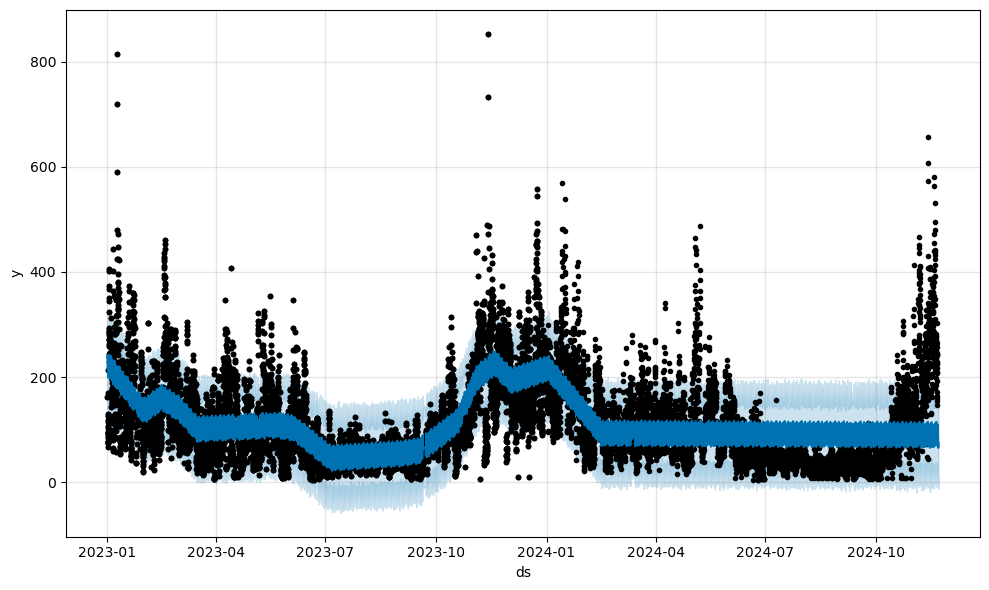

In [81]:
fig1 = model.plot(forecast1)

"plot_components_plotly" creates interactive plots using Plotly, allowing for zooming and hovering over data points for more detailed exploration.

C:\Users\VISHAL\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

C:\Users\VISHAL\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

C:\Users\VISHAL\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



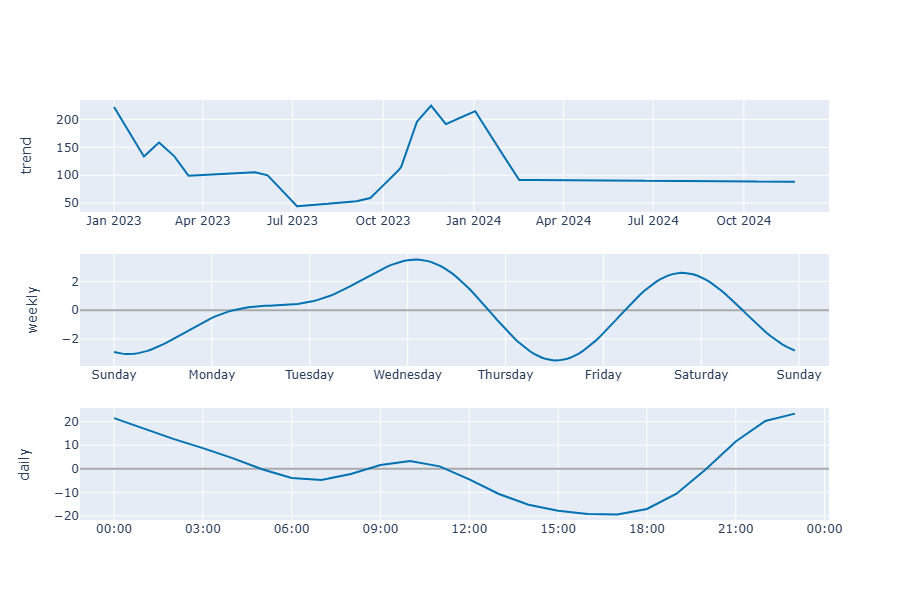

In [80]:
plot_components_plotly(model, forecast1)

In [83]:
# training the prophet model for PM10
model = Prophet()
model.fit(model2)

01:32:44 - cmdstanpy - INFO - Chain [1] start processing
01:33:13 - cmdstanpy - INFO - Chain [1] done processing


In [84]:
future2 = model.make_future_dataframe(periods=20, freq='H')
future2.tail()

,ds
15585,2024-11-21 15:00:00
15586,2024-11-21 16:00:00
15587,2024-11-21 17:00:00
15588,2024-11-21 18:00:00
15589,2024-11-21 19:00:00


In [85]:
forecast2 = model.predict(future2)
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(20)

,ds,yhat,yhat_lower,yhat_upper
15570,2024-11-21 00:00:00,244.608501,108.447752,386.901620
15571,2024-11-21 01:00:00,229.855491,78.310310,368.637556
15572,2024-11-21 02:00:00,215.860189,68.768508,354.646991
15573,2024-11-21 03:00:00,202.663569,56.685357,352.042810
15574,2024-11-21 04:00:00,189.174578,33.088159,339.592658
15575,2024-11-21 05:00:00,176.754269,41.858815,314.049128
15576,2024-11-21 06:00:00,169.536215,21.825407,314.658483
15577,2024-11-21 07:00:00,170.950709,25.061800,315.101501
15578,2024-11-21 08:00:00,179.927045,26.473300,322.239467
15579,2024-11-21 09:00:00,190.728688,36.719807,334.487990


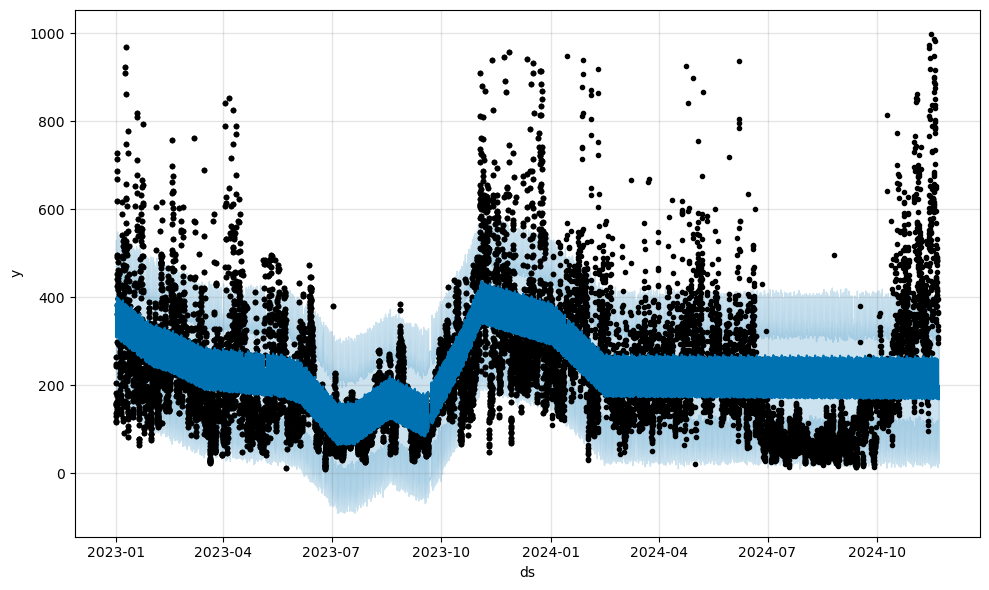

In [86]:
fig2 = model.plot(forecast2)

C:\Users\VISHAL\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

C:\Users\VISHAL\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

C:\Users\VISHAL\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



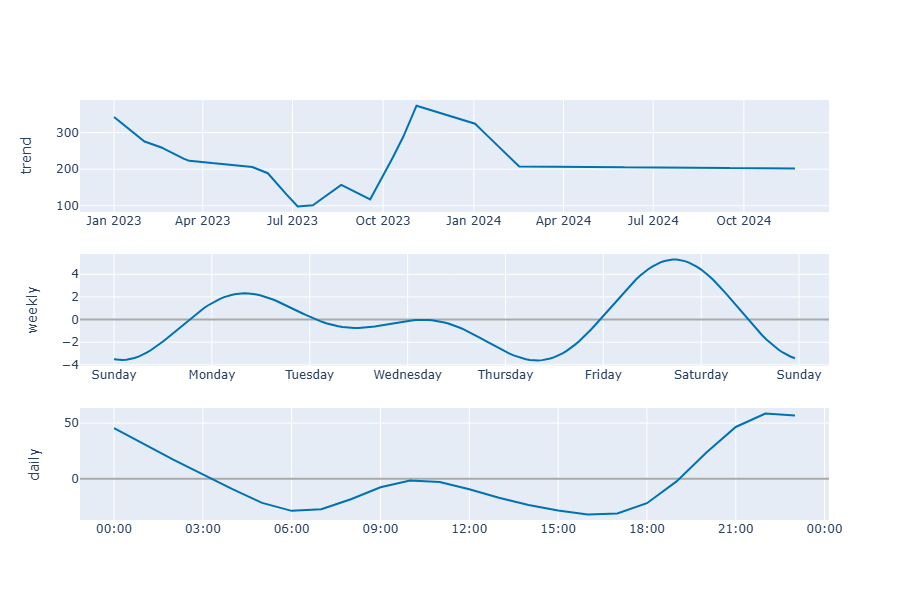

In [87]:
plot_components_plotly(model, forecast2)

Thank You!